<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/brain-tumor-classification/blob/main/Brain_Tumor_Segmentation_Flint_Regonial_Science_and_Engineering_Fair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installing 

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

In [ ]:
!nvidia-smi

# preparing images 

In [ ]:
# Extract Images
images_path = "dataset.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 100 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

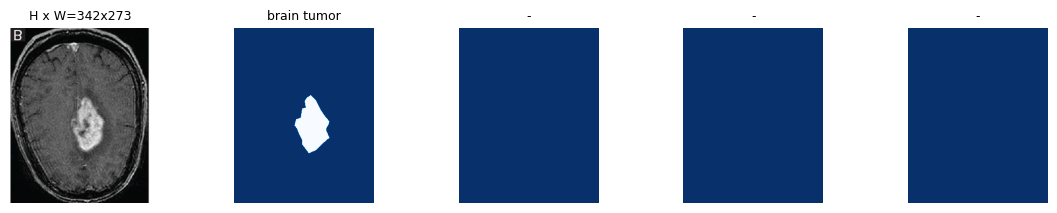

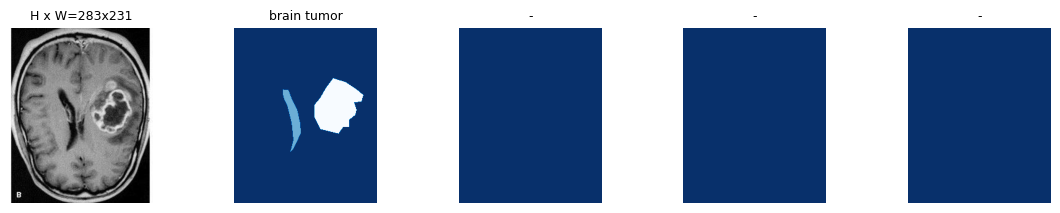

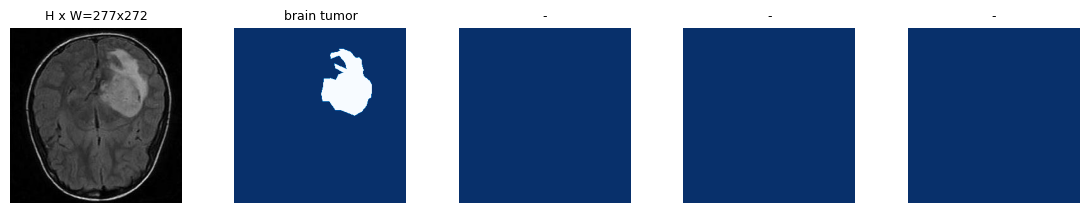

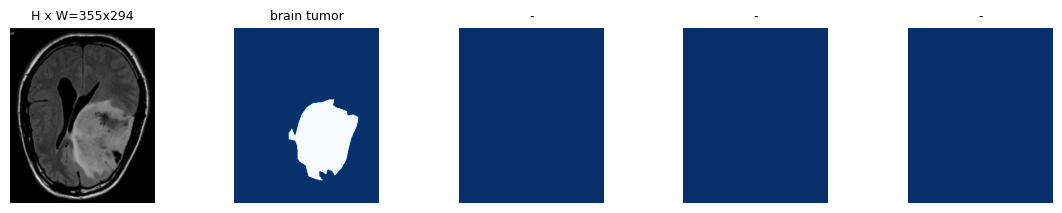

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

# training 

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)

# testing

In [ ]:
#test on random image 
test_model, inference_config = load_test_model(class_number)
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

--2023-04-09 17:39:41--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip.1’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K  --.-KB/s    in 0.1s    

2023-04-09 17:39:42 (573 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip.1’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
replace maskrcnn_colab/mrcnn_demo/model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
replace maskrcnn_colab/mrcnn_demo/m_rcnn.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
replace maskrcnn_colab/mrcnn_demo/parallel_m

In [ ]:
!nvidia-smi

Sun Apr  9 17:41:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |  14647MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Load Image
img = cv2.imread("/content/drive/MyDrive/data /yes/y1003.jpg")

test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/mask_rcnn_object_0005.h5


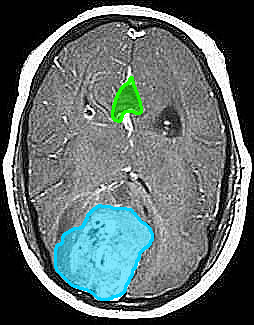

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)